<a href="https://colab.research.google.com/github/how-to-train-your-model/data-science-portfolio/blob/main/451_A5_Coding_Assignment_MDA_on_economic_factors_as_predictors_of_S%26P_500_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5 Coding Assignment: 
MDA on economic factors as predictors of S&P 500 index


# Libraries

In [167]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [168]:
# load libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import sweetviz as sv
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn import preprocessing

from sklearn.metrics import log_loss,accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestRegressor




In [169]:
# Allows for muliple output in one cell window
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Allows for viewing the complete data in a single window 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [170]:
from google.colab import drive
drive.mount('/content/drive')
!ls -l "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W5"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
total 8200
-rw------- 1 root root  224826 Feb 19 16:03 '451_A5_Pant_Coding Assignment: MDA on economic factors as predictors of S&P 500 index.docx'
-rw------- 1 root root   41999 Feb 19 17:23 '451_A5_Pant_Coding Assignment: MDA on economic factors as predictors of S&P 500 index.ipynb'
-rw------- 1 root root 7720843 Feb 19 16:09 'MSDS 451 Assignment_04_Chan-1.ipynb'
-rw------- 1 root root  391579 Feb 18 19:59  S_P_mnthly_returns_input-2.csv
-rw------- 1 root root   16009 Feb 18 19:59  S_P_mnthly_returns_output-2.csv


In [171]:
w5_files = "/content/drive/My Drive/Colab_Notebooks/MSDS-451/W5"

Data_In = pd.read_csv(w5_files+"/S_P_mnthly_returns_input-2.csv")
Ret_Out = pd.read_csv(w5_files+"/S_P_mnthly_returns_output-2.csv")

Data_In.head(2)
Ret_Out.head(2)
#Data_In.dtypes
Ret_Out.dtypes

,date,Index,D12,E12,b/m,tbl,ntis,infl,ltr,corpr,svar,csp,AAA_FD,BAA_FD,lty_FD
0,187112,4.74,0.2600,0.4000,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123
1,187201,4.86,0.2633,0.4025,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123


,date,Eq_Premium
0,187112,1
1,187201,1


date          int64
Eq_Premium    int64
dtype: object

In [172]:

# setting the date column as index for the dataset.
Data_In = Data_In.set_index('date')
Ret_Out = Ret_Out.set_index('date')

In [173]:
Data_In.head(2)
Ret_Out.head()

,Index,D12,E12,b/m,tbl,ntis,infl,ltr,corpr,svar,csp,AAA_FD,BAA_FD,lty_FD
date,,,,,,,,,,,,,,
187112,4.74,0.2600,0.4000,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123
187201,4.86,0.2633,0.4025,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123


,Eq_Premium
date,
187112,1
187201,1
187202,1
187203,1
187204,1


# Question 1

Setting the random seed to 1, and using the same dataset as in the Module 4 assignment, compute the feature importance scores of each feature by applying the featImportance function (Snippet 8.8 in AFML) on the 10 cross validation sets within the train set defined there. Why can’t FS be applied to the train set as a whole? (For a hint, please read this.Links to an external site.) (2 pt) 

## Labels

In [174]:
# Defining Labels

#date	Index	D12	E12	b/m	tbl	ntis	
#infl	ltr	corpr	svar	csp	AAA_FD	BAA_FD	lty_FD

dfq1 = df.copy()
dfq1 = df.rename(columns={"yyyymm": "Date_YYYYMM"
  , "Index": "SP_500_Index"
  , "D12": "Twel_mon_mov_sums_of_divi"
  , "E12": "Twel_mon_mov_sums_of_earn"
  , "b/m": "Book_to_Market_Ratio"
  , "tbl": "Treasury_Bills"
  , "ntis": "Net_Equity_Expansion"
  , "ltr": "Long_Term_Rate_of_Returns"
  , "corpr": "Long_term_corporate_bond_return"
  , "svar": "Stock_Variance"
  , "csp": "Cross-Sectional_Premium"
  , "AAA_FD": "AAA_rated_bonds"
  , "BAA_BD": "BAA_rated_bonds"
  , "lty_FD": "Long_Term_Yield"}
  
  )

## EDA

In [175]:
dfq1.head(2)
df_EDA = dfq1.copy()

,date,SP_500_Index,Twel_mon_mov_sums_of_divi,Twel_mon_mov_sums_of_earn,Book_to_Market_Ratio,Treasury_Bills,Net_Equity_Expansion,infl,Long_Term_Rate_of_Returns,Long_term_corporate_bond_return,Stock_Variance,Cross-Sectional_Premium,AAA_rated_bonds,BAA_FD,Long_Term_Yield
0,1871-12-01,4.74,0.2600,0.4000,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123
1,1872-01-01,4.86,0.2633,0.4025,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123


In [176]:
#df_EDA['SP_500_Index'] = df_EDA['SP_500_Index'].str.replace(',', '').astype(float)


In [177]:
print("\n\n Duplicates",df_EDA.duplicated().sum())
#my_report = sv.analyze(df_EDA)
#my_report.show_html()



 Duplicates 0


In [178]:
print("\n\n Missing Values before dropping/Imputing \n",df_EDA.isna().sum())



 Missing Values before dropping/Imputing 
 date                               0
SP_500_Index                       0
Twel_mon_mov_sums_of_divi          0
Twel_mon_mov_sums_of_earn          0
Book_to_Market_Ratio               0
Treasury_Bills                     0
Net_Equity_Expansion               0
infl                               0
Long_Term_Rate_of_Returns          0
Long_term_corporate_bond_return    0
Stock_Variance                     0
Cross-Sectional_Premium            0
AAA_rated_bonds                    0
BAA_FD                             0
Long_Term_Yield                    0
dtype: int64


## 1.1 FI score
compute the feature importance scores of each feature by applying the featImportance function (Snippet 8.8 in AFML) on the 10 cross validation sets within the train set defined there. 

In [191]:
# preprring data fro q1

dfq1_In = Data_In.copy(deep = True)
dfq1_Out = Ret_Out.copy(deep = True)
dfq1_Out = dfq1_Out.astype('float64')
#dfq1_In.dtypes

In [192]:
#dfq1_In['Index'] = dfq1_In['Index'].str.replace(',', '').astype(float)
dfq1_In.head(2)
dfq1_Out.head(2)

,Index,D12,E12,b/m,tbl,ntis,infl,ltr,corpr,svar,csp,AAA_FD,BAA_FD,lty_FD
date,,,,,,,,,,,,,,
187112,4.74,0.2600,0.4000,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123
187201,4.86,0.2633,0.4025,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123


,Eq_Premium
date,
187112,1.0
187201,1.0


### Functions (from Scott)

In [193]:
#Derived from Advances in Financial Machine Learning, pp 116-117, Marcos Lopez de Prado
from sklearn.model_selection._split import KFold
import datetime as dt

def featImpMDA_classify(clf,X,y,cv,scoring='neg_log_loss'):
    # feat importance based on OOS score reduction
    if scoring not in ['neg_log_loss', 'accuracy']:
        raise Exception('wrong scoring method.')
    print('start MDA',dt.datetime.now())
    
    from sklearn.metrics import log_loss, accuracy_score
    cvGen=KFold(n_splits=cv)
    scr0,scr1=pd.Series(),pd.DataFrame(columns=X.columns)
    for i,(train,test) in enumerate(cvGen.split(X=X)):
        print('   Split',i+1)
        X0,y0=X.iloc[train,:],y.iloc[train]
        X1,y1=X.iloc[test,:],y.iloc[test]
        fit=clf.fit(X=X0,y=y0)
        if scoring=='neg_log_loss':
            prob=fit.predict_proba(X1)
            scr0.loc[i]=-log_loss(y1,prob,labels=clf.classes_)
            
        else:
            pred=fit.predict(X1)
            scr0.loc[i]=accuracy_score(y1,pred)

        for j in X.columns:
            X1_=X1.copy(deep=True)
            np.random.shuffle(X1_[j].values) # permutation of a single column
            if scoring=='neg_log_loss':
                prob=fit.predict_proba(X1_)
                scr1.loc[i,j]=-log_loss(y1,prob,labels=clf.classes_)
            else:
                pred=fit.predict(X1_)
                scr1.loc[i,j]=accuracy_score(y1,pred)
    imp=(0-scr1).add(scr0,axis=0)     #imp = scr1.add(scr0, axis = 0)
    imp =imp/(0-scr1)                 #imp=imp/-scr1
    imp=pd.concat({'mean':imp.mean(),'std':imp.std()*imp.shape[0]**-.5},axis=1)
    print('end MDA',dt.datetime.now())
    return imp

 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
    
# featImpMDA_classify(clf,X,y,cv,scoring='neg_log_loss')

def featImportance(trnsX,cont,n_estimators=1000,cv=10,max_samples=1,
                   numThreads=24,pctEmbargo=0,scoring='accuracy',
                   method='MDA',minWLeaf=0):
    # feature importance from a random forest
    
    n_jobs=(-1 if numThreads>1 else 1)
    # run 1 thread with ht_helper in dirac1
    #1) prepare classifier,cv. max_features=1, to prevent masking
    clf=DecisionTreeClassifier(criterion='entropy',max_features=1,
                                class_weight='balanced',
                               min_weight_fraction_leaf=minWLeaf)
    
    clf=BaggingClassifier(base_estimator=clf,n_estimators=n_estimators,
                          max_features=1,
                          max_samples=max_samples,
                          oob_score=True,n_jobs=n_jobs)
    
    fit=clf.fit(X=trnsX,y=cont)
    oob=fit.oob_score_
    imp,oos=featImpMDA_classify(clf,X=trnsX,y=cont,cv=cv,scoring=scoring)
        
    return imp,oob,oos


# From rfpimp: https://pypi.org/project/rfpimp/

def plot_importances(df_importances, save=None, xrot=0, tickstep=3,
                     label_fontsize=12,
                     figsize=None, scalefig=(1.0, 1.0), show=True, show_cutoff=False):
    """
    Given an array or data frame of importances, plot a horizontal bar chart
    showing the importance values.

    :param df_importances: A data frame with Feature, Importance columns
    :type df_importances: pd.DataFrame
    :param save: A filename identifying where to save the image.
    :param xrot: Degrees to rotate importance (X axis) labels
    :type xrot: int
    :param tickstep: How many ticks to skip in X axis
    :type tickstep: int
    :param label_fontsize:  The font size for the column names and x ticks
    :type label_fontsize:  int
    :param figsize: Specify width and height of image (width,height)
    :type figsize: 2-tuple of floats
    :param scalefig: Scale width and height of image (widthscale,heightscale)
    :type scalefig: 2-tuple of floats
    :param show: Execute plt.show() if true (default is True). Sometimes
                 we want to draw multiple things before calling plt.show()
    :type show: bool
    :return: None

    SAMPLE CODE
       rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
    X_train, y_train = ..., ...
    rf.fit(X_train, y_train)
    imp = importances(rf, X_test, y_test)
    plot_importances(imp)
    """
    I = df_importances

    if figsize:
        fig = plt.figure(figsize=figsize)
    elif scalefig:
        fig = plt.figure()
        w, h = fig.get_size_inches()
        fig.set_size_inches(w * scalefig[0], h * scalefig[1], forward=True)
    else:
        fig = plt.figure()
    ax = plt.gca()
    labels = []
    for col in I.index:
        if isinstance(col, list):
            labels.append('\n'.join(col))
        else:
            labels.append(col)

    for tick in ax.get_xticklabels():
        tick.set_size(label_fontsize)
    for tick in ax.get_yticklabels():
        tick.set_size(label_fontsize)
    ax.barh(np.arange(len(I.index)), I.Importance, height=0.6, tick_label=labels)
    
    
    # rotate x-ticks
    if xrot is not None:
        plt.xticks(rotation=xrot)

    # xticks freq
    xticks = ax.get_xticks()
    nticks = len(xticks)
    new_ticks = xticks[np.arange(0, nticks, step=tickstep)]
    ax.set_xticks(new_ticks)
    
    if show_cutoff:
        # Plot the cutoff importance as vertical dotted line as per Figure 8.2 of AFML
        plt.axvline(1./df_importances.shape[0], linewidth = 1, color= 'r', linestyle = 'dotted')
        print('importance cutoff=', 1./df_importances.shape[0])
    if save:
        plt.savefig(save, bbox_inches="tight", pad_inches=0.03)
    if show:
        plt.show()

## 1.1 code

In [194]:
np.random.seed(1)
dfq1_In.head(2)
dfq1_Out.head(2)

,Index,D12,E12,b/m,tbl,ntis,infl,ltr,corpr,svar,csp,AAA_FD,BAA_FD,lty_FD
date,,,,,,,,,,,,,,
187112,4.74,0.2600,0.4000,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123
187201,4.86,0.2633,0.4025,0.558793,0.034042,0.016456,0.00257,0.004793,0.005164,0.00249,0.000364,-1.063045,-0.993488,-1.112123


,Eq_Premium
date,
187112,1.0
187201,1.0


### Not working

---
Not working with simple train and test

In [203]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(dfq1_In, dfq1_Out, 
                                                    test_size=0.3, random_state=1) # 70% training and 30% test


### working with train and validation split


In [208]:
#As suggested, splitting between train, valid and test
def train_valid_test_split(df, trainFraction, validFraction):
  assert(trainFraction + validFraction < 1)
  X = df.copy()
  trainset=np.arange(np.round(trainFraction*X.shape[0]))
  validset=np.arange(trainset[-1]+1,trainset[-1]+1+np.round(validFraction*X.shape[0]))
  testset=np.arange(validset[-1]+1,X.shape[0])
  X_train, X_valid, X_test = X.iloc[trainset,], X.iloc[validset,], X.iloc[testset,]
  return X_train, X_valid, X_test
train=0.7
valid=0.2
X_train_in, X_valid_in, X_test_in = train_valid_test_split(dfq1_In, train, valid)
Y_train_out, Y_valid_out, Y_test_out = train_valid_test_split(dfq1_Out, train, valid)

In [209]:
import warnings
warnings.simplefilter('ignore')
#np.random.seed(1)
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 1,
                                class_weight = 'balanced',
                               min_weight_fraction_leaf = 0)
    
clf = BaggingClassifier(base_estimator = clf, n_estimators = 1000,
                          max_features = 1,
                          max_samples = 1.,
                          oob_score = True, n_jobs = -1)

#mda_imps = featImpMDA_classify(clf, X_train, y_train, cv = 10,
  #                             scoring = 'neg_log_loss')

mda_imps = featImpMDA_classify(clf, X_train_in, Y_train_out, cv = 10,
                               scoring = 'neg_log_loss')


print(mda_imps.sort_values(by="mean",
                           ascending=False))

start MDA 2023-02-19 18:04:50.082374
   Split 1
   Split 2
   Split 3
   Split 4
   Split 5
   Split 6
   Split 7
   Split 8
   Split 9
   Split 10
end MDA 2023-02-19 18:06:42.300851
            mean       std
csp     0.006523  0.003637
svar    0.005264  0.003113
ntis    0.004258  0.004617
E12     0.003007  0.005156
corpr   0.002731  0.002444
lty_FD  0.002360  0.001337
AAA_FD  0.001979  0.001325
D12     0.001268  0.002136
b/m     0.000506  0.001555
ltr    -0.000507  0.003032
tbl    -0.002641  0.001582
infl   -0.002972  0.001934
Index  -0.004999  0.005630
BAA_FD -0.005063  0.001587


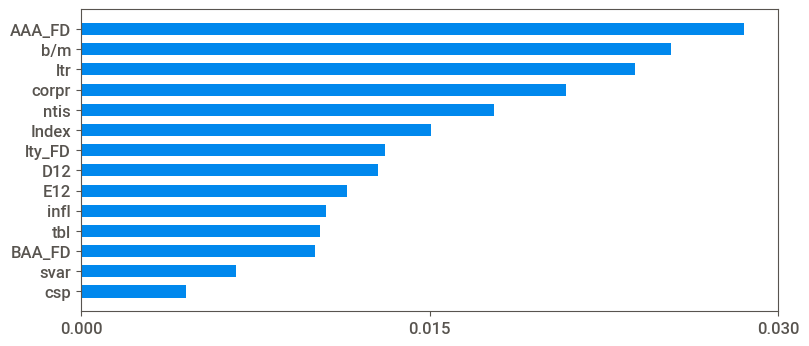

In [207]:
#With results, use something like this to plot the results:

import matplotlib.pyplot as plt

m_imps = mda_imps.reset_index().rename(index = int,
                                       columns = {"index":"Feature",
                                                  'mean':'Importance'},
                                        inplace = False).set_index('Feature')
m_imps = m_imps.sort_values(by = 'Importance')
plot_importances(m_imps, scalefig = (1.5, 1.0))


# Q2: FI score
If you obtain a different FI score for a feature in each cross validation subset, how is the overall FI score computed? (1 pt)

----

If we obtain different feature importance (FI) scores for a feature in each cross-validation subset, you can compute an overall FI score by aggregating the subset scores by taking the average, mean, or median.

In the reference code provided, the feature importance after 10 cross-validation subsets is calculated as mean:   imp=pd.concat({'mean':imp.mean(),'std':imp.std()*imp.shape[0]**-.5},axis=1)


# Q3) 5 most important features
What are the 5 most important features? What are the features with above-average FI scores? (2 pt)


In [186]:
print(mda_imps.sort_values(by="mean", ascending=False))
#print('\n Average FI score: ',mda_imps['mean'].mean())

#print(mda_imps[mda_imps['mean'] > mda_imps['mean'].mean()].sort_values(by="mean",
                           #ascending=False))

            mean       std
D12     0.023503  0.002671
AAA_FD  0.020307  0.005128
b/m     0.018584  0.003103
ltr     0.017591  0.006847
ntis    0.017252  0.003223
corpr   0.015498  0.003155
E12     0.015474  0.004395
infl    0.012964  0.004512
tbl     0.011505  0.002938
BAA_FD  0.011390  0.004037
Index   0.009867  0.004300
lty_FD  0.006900  0.002670
svar    0.004610  0.002212
csp     0.004293  0.002801


In [187]:
m_imps_q3 = m_imps.drop(['csp', 'lty_FD', 'svar','infl','tbl'])
m_imps_q3.sort_values(by = 'Importance', ascending = False)
#m_imps_q3

,Importance,std
Feature,,
D12,0.023503,0.002671
AAA_FD,0.020307,0.005128
b/m,0.018584,0.003103
ltr,0.017591,0.006847
ntis,0.017252,0.003223
corpr,0.015498,0.003155
E12,0.015474,0.004395
BAA_FD,0.011390,0.004037
Index,0.009867,0.004300


importance cutoff= 0.1111111111111111


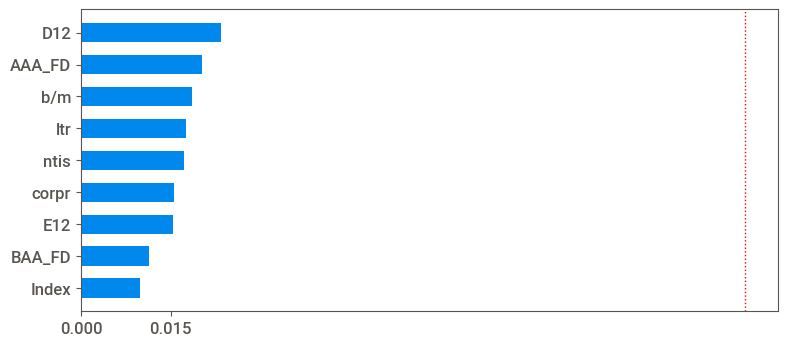

In [188]:
m_imps_q3 = m_imps_q3.reset_index().rename(index = int,
                                       columns = {"index":"Feature",
                                                  'mean':'Importance'},
                                        inplace = False).set_index('Feature')
m_imps_q3 = m_imps_q3.sort_values(by = 'Importance')
plot_importances(m_imps_q3,scalefig=(1.5,1.0), show_cutoff=True)

In [ ]:
# drop 

# Q4: RF for A04
If you use only those above-average features as input, and retrain a RF as in the Module 4 assignment to predict the same labels, do any of the performance metrics improve? (2 pt) 


[A04_Code](https://drive.google.com/file/d/1c-43v1ymRKrS-kGu8FkeNuGYnQKp7JGu/view?usp=sharing)

# Q5: Random seed to 2

Now set the random seed to 2, and recompute #3. Are they different? 

In [ ]:

np.random.seed(2)

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True)
X = df1.drop(drop_columns, axis=1)
y = df1["Eq_Premium"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33)#,  random_state=1)
clf = DecisionTreeClassifier(criterion = 'entropy', max_features = 1,
                                class_weight = 'balanced',
                               min_weight_fraction_leaf = 0)
    
clf = BaggingClassifier(base_estimator = clf, n_estimators = 1000,
                          max_features = 1,
                          max_samples = 1.,
                          oob_score = True, n_jobs = -1)


mda_imps = featImpMDA_classify(clf, X_train, y_train, cv = 10,
                               scoring = 'neg_log_loss')


print(mda_imps.sort_values(by="mean",
                           ascending=False))

In [ ]:
#With results, use something like this to plot the results:

import matplotlib.pyplot as plt

m_imps = mda_imps.reset_index().rename(index = int,
                                       columns = {"index":"Feature",
                                                  'mean':'Importance'},
                                        inplace = False).set_index('Feature')
m_imps = m_imps.sort_values(by = 'Importance')
plot_importances(m_imps, scalefig = (1.5, 1.0))


In [ ]:
print(mda_imps)
mda_imps.dtypes

In [ ]:
print(mda_imps.sort_values(by="mean",
                           ascending=False))
print('\n Average FI score: ',mda_imps['mean'].mean())

print(mda_imps[mda_imps['mean'] > mda_imps['mean'].mean()].sort_values(by="mean",
                           ascending=False))